# Deep Learning

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [39]:
import pandas as pd
import numpy as np
train=pd.read_csv('/content/gdrive/MyDrive/Human Activity/train.csv')
test=pd.read_csv('/content/gdrive/MyDrive/Human Activity/test.csv')

In [3]:
print(train.shape, test.shape)

(7352, 563) (2947, 563)


In [40]:
mapActivity={'STANDING':4,'SITTING':3,'LAYING':5,'WALKING':0,'WALKING_DOWNSTAIRS':2,'WALKING_UPSTAIRS':1}
train['Target']=train['Activity'].map(mapActivity)
test['Target']=test['Activity'].map(mapActivity)

In [41]:
X_train = train.drop(['subject', 'Activity','Target'], axis=1)
y_train = train['Target']

In [42]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity','Target'], axis=1)
y_test = test['Target']

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Flatten,Reshape
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
import csv
from tensorflow.keras.models import Model
#import keras
from tensorflow.keras import backend as k
from tensorflow.keras.layers import Input,Concatenate,Dropout,Dense,BatchNormalization,Conv1D
from tensorflow.keras.layers import Input
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#from tensorflow.keras.merge import concatenate
#import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import scipy
from tensorflow.keras.initializers import he_normal,glorot_normal
from tensorflow.keras.regularizers import l1,l2
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint,LearningRateScheduler,ReduceLROnPlateau
from time import time
from tensorflow.keras.utils import plot_model

In [46]:
y_train=tf.keras.utils.to_categorical(y_train,num_classes=6)
y_train.shape

(7352, 6)

In [47]:
y_test=tf.keras.utils.to_categorical(y_test,num_classes=6)
y_test.shape

(2947, 6)

# Simple MLP-I

In [13]:
from tensorflow.keras import regularizers
def simple_mlp_model2(input_shape):   
    model_in = Input(shape=(input_shape,), dtype='float32')
    out = Dense(192,activation='relu',kernel_regularizer=regularizers.l2(0.001))(model_in)
    out = BatchNormalization()(out)
    out = Dropout(0.60)(out)
    out = Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.001))(out)
    out = BatchNormalization()(out)
    out = Dropout(0.60)(out)
    out = Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.001))(out)
    out = BatchNormalization()(out)
    out = Dropout(0.60)(out)
    out = Dense(6,activation='softmax')(out)
    model = Model(model_in, out)
    return model

In [14]:
model=simple_mlp_model2(X_train.shape[1])

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 561)]             0         
_________________________________________________________________
dense (Dense)                (None, 192)               107904    
_________________________________________________________________
batch_normalization (BatchNo (None, 192)               768       
_________________________________________________________________
dropout (Dropout)            (None, 192)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               24704     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0     

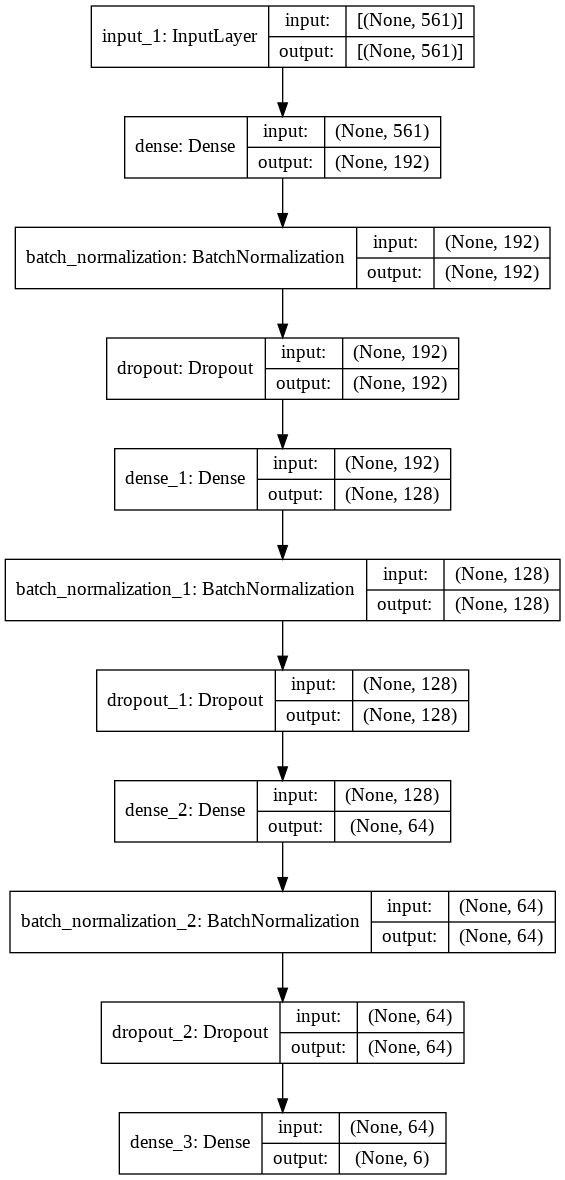

In [16]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB')

In [21]:
from tensorflow.keras.callbacks import *
import os
filepath="weights_4.best.hdf1"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, mode='max')
earlystop = EarlyStopping(monitor = 'val_accuracy',  mode="max",min_delta = 0, patience = 10,verbose = 1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.25, patience = 5, verbose = 1)
%reload_ext tensorboard
import datetime
logdir = os.path.join("logs_4", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
tensorboard = TensorBoard(log_dir=logdir, histogram_freq=0, write_graph=True, write_grads=False, write_images=False)
callbacks = [checkpoint,reduce_lr,tensorboard,earlystop]

In [18]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
adam = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
hitory1=model.fit(x=X_train,y=y_train,epochs=200,batch_size=1024,validation_data=(X_test, y_test))

Epoch 1/200
8/8 [==============================] - 0s 53ms/step - loss: 1.5298 - accuracy: 0.6206 - val_loss: 1.1134 - val_accuracy: 0.7743
Epoch 2/200
8/8 [==============================] - 0s 34ms/step - loss: 1.5162 - accuracy: 0.6281 - val_loss: 1.1140 - val_accuracy: 0.7730
Epoch 3/200
8/8 [==============================] - 0s 33ms/step - loss: 1.5210 - accuracy: 0.6236 - val_loss: 1.1139 - val_accuracy: 0.7730
Epoch 4/200
8/8 [==============================] - 0s 33ms/step - loss: 1.5101 - accuracy: 0.6381 - val_loss: 1.1137 - val_accuracy: 0.7740
Epoch 5/200
8/8 [==============================] - 0s 35ms/step - loss: 1.5328 - accuracy: 0.6159 - val_loss: 1.1137 - val_accuracy: 0.7747
Epoch 6/200
8/8 [==============================] - 0s 35ms/step - loss: 1.5272 - accuracy: 0.6236 - val_loss: 1.1133 - val_accuracy: 0.7757
Epoch 7/200
8/8 [==============================] - 0s 33ms/step - loss: 1.5193 - accuracy: 0.6220 - val_loss: 1.1127 - val_accuracy: 0.7757
Epoch 8/200
8/8 [===

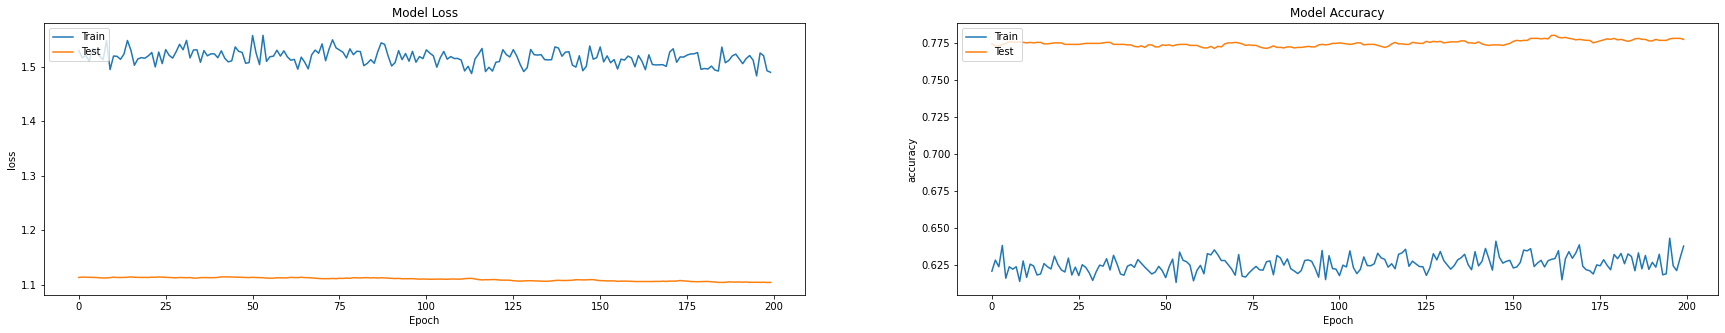

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(hitory1.history['loss'])
plt.plot(hitory1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation f1_score
plt.subplot(122)
plt.plot(hitory1.history['accuracy'])
plt.plot(hitory1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [60]:
y_pred=model.predict(X_test)
y_test_=np.argmax(y_test, axis=-1)
y_pred_=np.argmax(y_pred, axis=-1)
print('Valid Accuracy:-',accuracy_score(y_test_,y_pred_))

Valid Accuracy:- 0.7774007465218866


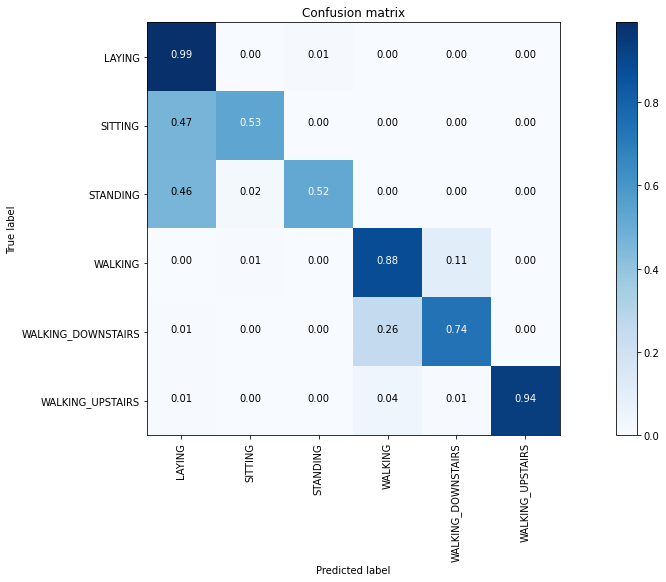

In [61]:
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(y_test_, y_pred_)
plot_confusion_matrix(cm,labels)

# MLP-2

In [26]:
from tensorflow.keras import regularizers
def simple_mlp_model(input_shape):   
    model_in = Input(shape=(input_shape,), dtype='float32')
    out = Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.001))(model_in)
    out = BatchNormalization()(out)
    out = Dropout(0.40)(out)
    out = Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.001))(out)
    out = BatchNormalization()(out)
    out = Dropout(0.30)(out)
    out = Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001))(out)
    out = BatchNormalization()(out)
    out = Dropout(0.60)(out)
    out = Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.001))(out)
    out = BatchNormalization()(out)
    out = Dropout(0.30)(out)
    out = Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.001))(out)
    out = BatchNormalization()(out)
    out = Dropout(0.15)(out)
    out = Dense(6,activation='softmax')(out)
    model = Model(model_in, out)
    return model

In [27]:
model1=simple_mlp_model(X_train.shape[1])

In [28]:
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 561)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               287744    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0   

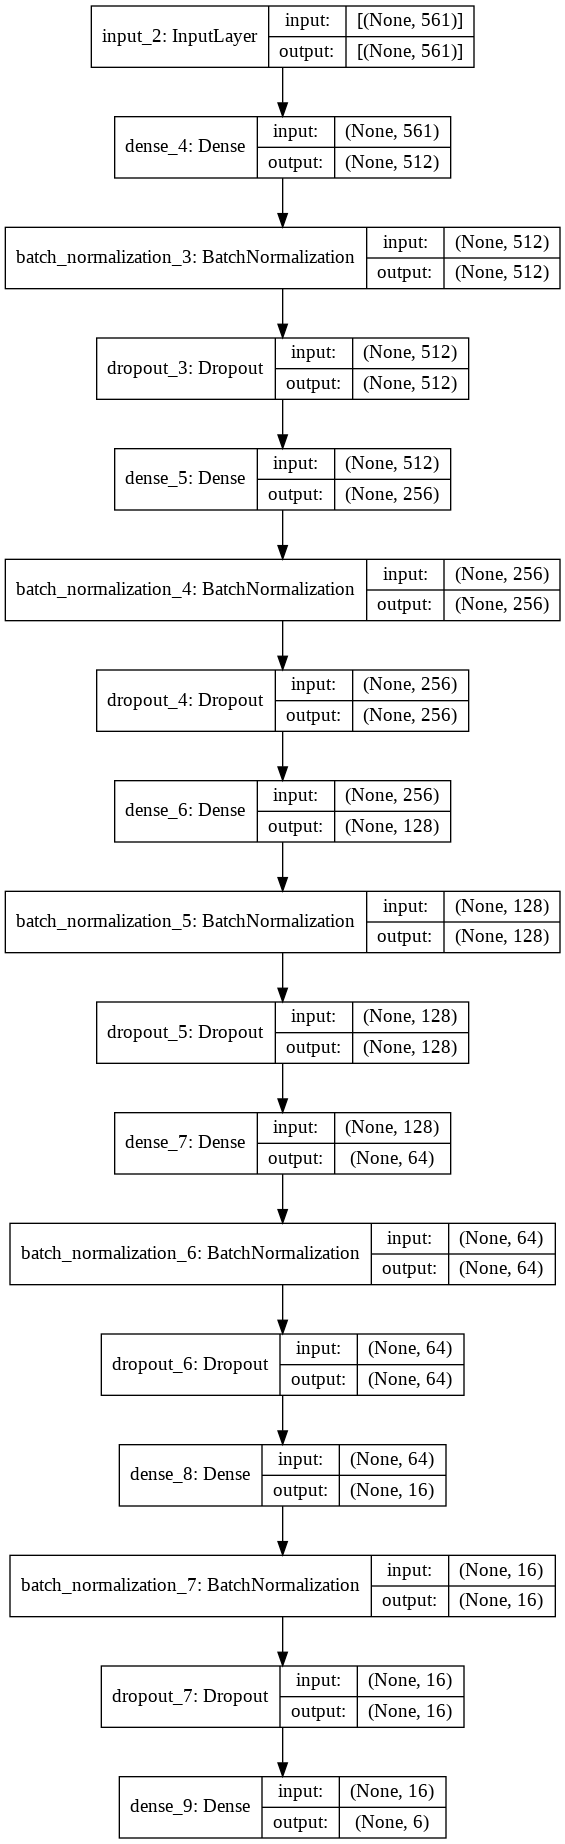

In [29]:
tf.keras.utils.plot_model(
    model1, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB')

In [30]:
import tensorflow as tf
adam = tf.keras.optimizers.Adam(lr=0.0001)
model1.compile(optimizer=adam, loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
hitory1=model1.fit(x=X_train,y=y_train,epochs=200,batch_size=1024,validation_data=(X_test, y_test))

Epoch 1/200
8/8 [==============================] - 3s 126ms/step - loss: 3.5436 - accuracy: 0.1780 - val_loss: 2.9770 - val_accuracy: 0.1792
Epoch 2/200
8/8 [==============================] - 1s 77ms/step - loss: 3.3246 - accuracy: 0.2189 - val_loss: 2.9452 - val_accuracy: 0.2124
Epoch 3/200
8/8 [==============================] - 1s 78ms/step - loss: 3.1500 - accuracy: 0.2636 - val_loss: 2.8881 - val_accuracy: 0.2328
Epoch 4/200
8/8 [==============================] - 1s 80ms/step - loss: 3.0242 - accuracy: 0.3060 - val_loss: 2.8319 - val_accuracy: 0.3417
Epoch 5/200
8/8 [==============================] - 1s 77ms/step - loss: 2.8810 - accuracy: 0.3490 - val_loss: 2.7794 - val_accuracy: 0.4092
Epoch 6/200
8/8 [==============================] - 1s 77ms/step - loss: 2.7906 - accuracy: 0.3808 - val_loss: 2.7214 - val_accuracy: 0.4992
Epoch 7/200
8/8 [==============================] - 1s 76ms/step - loss: 2.7057 - accuracy: 0.4155 - val_loss: 2.6597 - val_accuracy: 0.5521
Epoch 8/200
8/8 [==

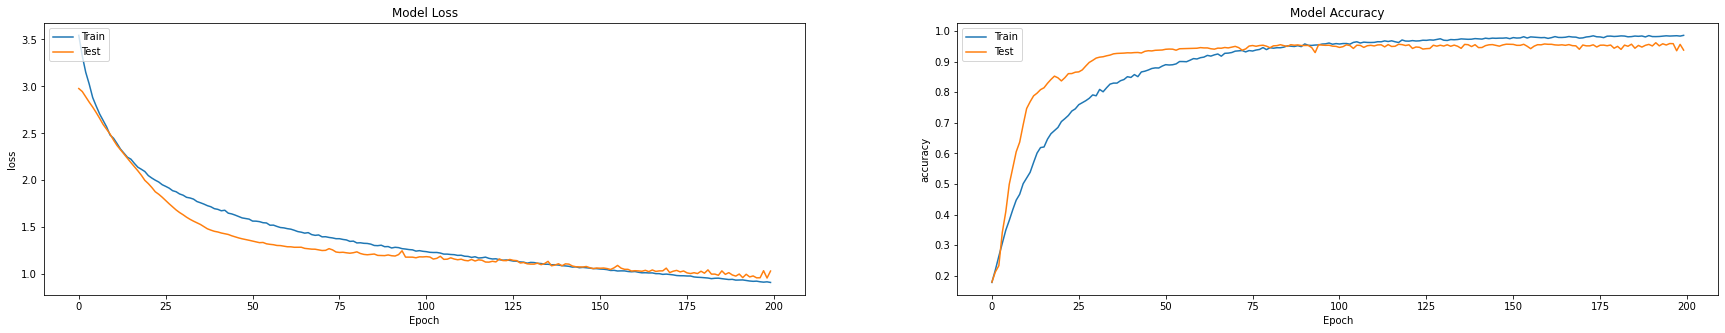

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(hitory1.history['loss'])
plt.plot(hitory1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation f1_score
plt.subplot(122)
plt.plot(hitory1.history['accuracy'])
plt.plot(hitory1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [51]:
y_pred=model1.predict(X_test)

In [52]:
y_test_=np.argmax(y_test, axis=-1)
y_pred_=np.argmax(y_pred, axis=-1)
print('Valid Accuracy:-',accuracy_score(y_test_,y_pred_))

Valid Accuracy:- 0.9379029521547336


In [54]:
import matplotlib.pyplot as plt
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
def plot_confusion_matrix(cm,classes=labels,normalize=True,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(16,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

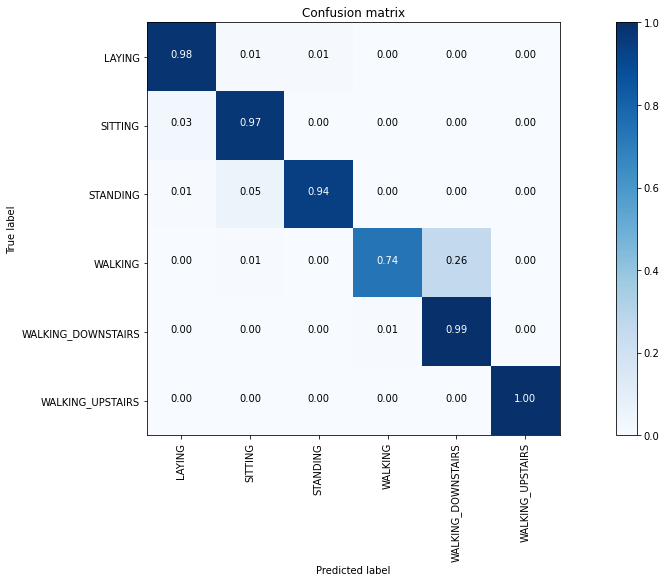

In [59]:
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(y_test_, y_pred_)
plot_confusion_matrix(cm,labels)